# Building a Handwritten Digits Classifier

Deep neural networks are being leveraged today for a variety of tasks. One such task is image classification. Image classification is difficult because each image highly dimensional and each pixel represents a feature. Thus, for high-resolution images, there can be millions of features. This requires a lot of computational power. To combat this, images are downplayed to lower resolutions. Deep neural networks can circumvent this issue through their ability to recognize complex nonlinear relationships.

In this project, I will create a deep neural network to classify images in the hand-written digits dataset by UCI, which is pre-loaded in the Scikit-Learn library. I will evaluate the models in this project using the accuracy scores.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

import warnings
warnings.simplefilter('ignore')

digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Below I convert the data into a dataframe and the labels into a series. 

In [3]:
data = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Below I create a visualization of the dataframe.

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

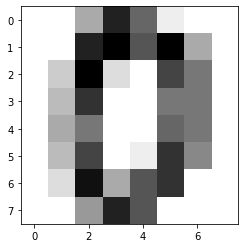

In [6]:
plt.imshow(np_image, cmap='gray_r')

Below are visualizations from sample rows from the data.

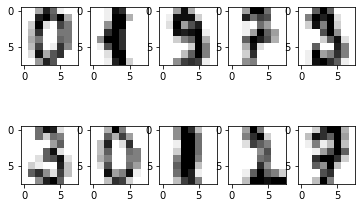

In [7]:
fig, axs = plt.subplots(2,5)

axs[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axs[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axs[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
axs[0,4].imshow(data.iloc[399].values.reshape(8,8), cmap='gray_r')

axs[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axs[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axs[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axs[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')
axs[1,4].imshow(data.iloc[1399].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Algorithm 

The KNN algorithm is a supervised learning technique in that it uses already labeled data to make predictions about the labels of unobserved data. It uses features from the data to determine the similarity between observed and unobserved data. It is non-parametric, which means this algorithm doesn't make assumptions about the distribution of underlying data. 

I use this algorithm as a baseline model to determine if the results can be improved upon using neural networks. 

In [8]:
def knn_algo(k):
    kf = KFold(5, shuffle = True, random_state = 1)
    knn = KNeighborsClassifier(n_neighbors = k)
    accuracy = cross_val_score(knn, data, labels, cv = kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

knn_accuracies = []
for k in range(1,10):
    knn_accuracies.append(knn_algo(k))

In [9]:
print(knn_accuracies)

[0.9872005571030641, 0.9844181367997524, 0.9877592076756423, 0.9844212318167751, 0.9844181367997524, 0.9827468276075517, 0.9849721448467965, 0.9810755184153512, 0.982189724543485]


Text(0.5, 1.0, 'KNN Accuracies for Values of K')

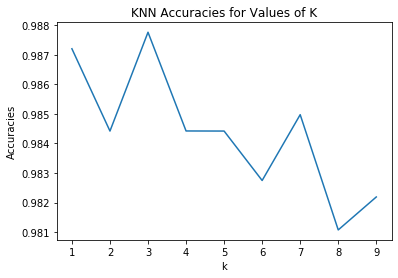

In [10]:
plt.plot(range(1,10), knn_accuracies)
plt.xlabel('k')
plt.ylabel('Accuracies')
plt.title('KNN Accuracies for Values of K')

#### Summary of KNN Results

Based on values of k ranging from 1 to 10, our results for the KNN algorithm yields about a 98% accuracy. This is a fantastic starting point; however, this means our neural networks must perform exceptionally well for us to opt for them. 

## Deep Neural Networks 

Artificial neural networks are inspired by the how the neurons in our brain our connected and work together. Deep neural networks are a type of artificial neural network that has many layers (hence, the term deep). There is an input layer, one or more hidden layers, and output layer. The layers are made of neurons, and they are connected by edges (which have particular weights or biases). Each layer after the input layers consists of neurons which are a linear combination of the neurons in the previous layer. This is to capture the nonlinearity in data. 

There still isn't a scientific method to determining the number of neurons per hidden layer or the number of hidden layers. So, for now, it is more of an art, and different parameters and hyperparameters should be tested. 

### Neural Network (One Hidden Layer)

In [11]:
def nn_one_model(n):
    kf = KFold(5, shuffle = True, random_state = 1)
    nn_one = MLPClassifier(hidden_layer_sizes = (n,))
    accuracy = cross_val_score(nn_one, data, labels, cv = kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

neurons = [8, 16, 32, 64, 128, 256]
nn_one_accuracies = []
for n in neurons:
    nn_one_accuracies.append(nn_one_model(n))

In [12]:
print(nn_one_accuracies)

[0.8825317239244816, 0.954942742185082, 0.9643964716805942, 0.9755153203342617, 0.974405756731662, 0.9827499226245744]


Text(0.5, 1.0, 'NN (One Hidden Layer) Accuracies\nfor Values of n')

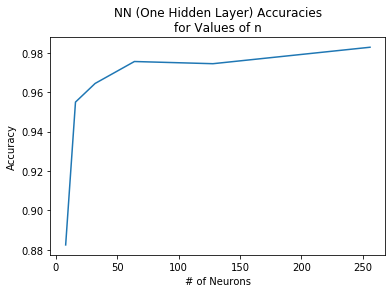

In [13]:
plt.plot(neurons, nn_one_accuracies)
plt.xlabel('# of Neurons')
plt.ylabel('Accuracy')
plt.title('NN (One Hidden Layer) Accuracies\nfor Values of n')

#### Summary of NN with One Hidden Layer

As can be seen in the graph above, the neural network with one hidden layer performs better with more neurons. The neural network with 256 neurons in the hidden layer has approximately 97.27% accuracy. There isn't any improvement in performance given one hidden layer. Let's explore a model with two hidden layers to see if there are any noticeable improvements. 

### Neural Network (Two Hidden Layers)

In [14]:
def nn_two_model(n):
    kf = KFold(5, shuffle = True, random_state = 1)
    nn_two = MLPClassifier(hidden_layer_sizes = (n,n))
    accuracy = cross_val_score(nn_two, data, labels, cv = kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

neurons = [8, 16, 32, 64, 128, 256]
nn_two_accuracies = []
for n in neurons:
    nn_two_accuracies.append(nn_two_model(n))

In [15]:
print(nn_two_accuracies)

[0.9026354069947384, 0.9471371092541009, 0.975526152893841, 0.9760755184153513, 0.9766295264623956, 0.9810817084493966]


Text(0.5, 1.0, 'NN (Two Hidden Layer) Accuracies\nfor Values of n')

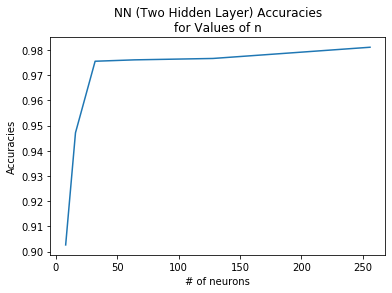

In [16]:
plt.plot(neurons, nn_two_accuracies)
plt.xlabel('# of neurons')
plt.ylabel('Accuracies')
plt.title('NN (Two Hidden Layer) Accuracies\nfor Values of n')

#### Summary of NN with Two Hidden Layers 

Compared to the NN with one hidden layer, this model doesn't perform much better either. This model achieves its highest accuracy with 128 neurons: 98.11%.

### Neural Network (Three Hidden Layers) 

In [17]:
def nn_three_model(n):
    kf = KFold(5, shuffle = True, random_state = 1)
    nn_three = MLPClassifier(hidden_layer_sizes = (n,n,n))
    accuracy = cross_val_score(nn_three, data, labels, cv = kf)
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

neurons = [10, 64, 128, 256]
nn_three_accuracies = []
for n in neurons:
    nn_three_accuracies.append(nn_three_model(n))

In [18]:
print(nn_three_accuracies)

[0.909843701640359, 0.9749628597957288, 0.9766279789538842, 0.9805292479108635]


Text(0.5, 1.0, 'NN (Three Hidden Layer) Accuracies\nfor Values of n')

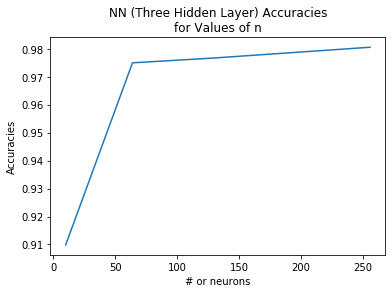

In [19]:
plt.plot(neurons, nn_three_accuracies)
plt.xlabel('# or neurons')
plt.ylabel('Accuracies')
plt.title('NN (Three Hidden Layer) Accuracies\nfor Values of n')

#### Summary of NN with Three Hidden Layers

Finally, we employ an NN model with three hidden layers. This model achieved its highest accuracy with 256 neurons in each hidden layer: 98.05%. Again, the performance is great, but not noticeably better than the results from the KNN algorithm.

As mentioned earlier, determining the parameters, hyperparameters, and type of activation functions, is an art more than a science (as for now). Similar to a Decision Tree or Random Forest model, we have to go about a number of trials to determine the "right" model.